## **영화 리뷰 데이터**

#### 1-1 데이터 준비 밀 초기 설정

In [1]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [2]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

Unknown System


In [3]:
import tensorflow as tf
import keras

print(tf.__version__)
print(keras.__version__)

2.8.2
2.8.0


In [4]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

* 매개변수 num_words=10000은 훈련 데이터에서 가장 자주 나타나는 단어 10,000개만 사용하겠다는 의미. 드물게 나타나는 단어는 무시
* train_data와 test_data는 리뷰 내용을 숫자료 표현
* train_labels와 test_labels (긍정 : 1, 부정 : 0)

In [5]:
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(25000,) (25000,)
(25000,) (25000,)


* train_data는 여러개의 단어로 이루어진 리뷰. 
* 리뷰 단어는 각각 매칭된 word index 값으로 이루어짐.
* train_labels는 1(긍정), 0(부정)이 됨.

#### train_data의 리뷰 살펴보기

In [6]:
# train_data의 하나(numpy)에서 10개 정도 확인해 보기 
print(type(train_data[0]),  len(train_data[0]))  # 자료형과 개수
print("하나의 리뷰 단어 개수 : ", len(train_data[0]))
train_data[0][0:15]

<class 'list'> 218
하나의 리뷰 단어 개수 :  218


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4]

In [7]:
# 5개의 긍정/부정 확인
train_labels[0:5]

array([1, 0, 0, 1, 0])

* 10개의 리뷰에 대한 숫자. 단어 인덱스 최대값은 얼마인가?
* 자주 등장하는 단어 10000개로 제한했기에 10000번 이하

In [8]:
[max(sequence) for sequence in train_data][0:10] # 10개 리뷰의 각 리뷰의 단어 인덱스의 최대값

[7486, 9837, 6905, 9941, 7224, 7982, 9363, 9820, 7612, 8419]

In [9]:
max([max(sequence) for sequence in train_data])

9999

##### 영화 리뷰 데이터 하나를 영어 단어로 구성된 문장으로 변경해 보기
* imdb.get_word_index() : 단어와 인덱스를 단어:인덱스 형태로 반환해 주는 것

In [10]:
# word_index는 단어와 정수 인덱스를 매핑한 딕셔너리입니다
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

##### 인덱스별 단어들

In [11]:
# 정수 인덱스와 단어를 매핑하도록 뒤집습니다
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

##### reverse_word_index 기능 확인

In [12]:
print(type(reverse_word_index))
dir(reverse_word_index)[-11:]   # 딕셔너리 기능 확인

<class 'dict'>


['clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

* 인덱스 2번 단어 얻기

In [13]:
# reverse_word_index.get(인덱스)       # 인덱스에 해당되는 단어가 출력
# reverse_word_index.get(인덱스, '?')  # 인덱스에 해당되는 단어가 출력되는데, 단어가 없으면 ? 출력
for i in range(0, 50, 1):
    print( reverse_word_index.get(i, '?'), end= "   " )
    
print("train 데이터 첫번째 3단어 살펴보기")
print("index 14 : ", reverse_word_index.get(14-3, '?'))
print("index 22 : ", reverse_word_index.get(22-3, '?'))
print("index 16 : ", reverse_word_index.get(16-3, '?'))

?   the   and   a   of   to   is   br   in   it   i   this   that   was   as   for   with   movie   but   film   on   not   you   are   his   have   he   be   one   all   at   by   an   they   who   so   from   like   her   or   just   about   it's   out   has   if   some   there   what   good   train 데이터 첫번째 3단어 살펴보기
index 14 :  this
index 22 :  film
index 16 :  was


#### 첫번째 리뷰 확인

In [14]:
print( train_data[0]  ) # 첫번째 리뷰(숫자 인덱스)

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [15]:
# train_data[0] : 하나의 리뷰(3, 6, 2, 5, 10...) => 218단어 ...
# [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
print(len( train_data[0]) )  # 첫번째 리뷰는 218개 인덱스(단어)로 이루어져 있다.
print([i for i in train_data[0]])  # train_data[0]인덱스가 for문이 돌아가면서 리스트 형태로 만들어진다.

218
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [16]:
# 두번째 리뷰 - 189개 인덱스(단어)로 이루어져 있고, 이에 대한 리스트를 만들어 출력해 본다.
print(len( train_data[1] ))  # 첫번째 리뷰는 218개 인덱스(단어)로 이루어져 있다.
print([i for i in train_data[1] ])  # train_data[0]인덱스가 for문이 돌아가면서 리스트 형태로 만들어진다.

189
[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 8255, 2, 349, 2637, 148, 605, 2, 8003, 15, 123, 125, 68, 2, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 2, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 2, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]


In [17]:
# [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
# 의미 : 각각의 인덱스(218)에 대한 단어를 리스트 형태로 만든다.
print("첫번째 리뷰의 인덱스를 단어로 매칭시켜서 보여준 것")
print([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
# ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
# 각각의 단어 리스트를 공백하나를 넣어주면서 하나의 문자열로 묶어 준것. 

첫번째 리뷰의 인덱스를 단어로 매칭시켜서 보여준 것
['?', 'this', 'film', 'was', 'just', 'brilliant', 'casting', 'location', 'scenery', 'story', 'direction', "everyone's", 'really', 'suited', 'the', 'part', 'they', 'played', 'and', 'you', 'could', 'just', 'imagine', 'being', 'there', 'robert', '?', 'is', 'an', 'amazing', 'actor', 'and', 'now', 'the', 'same', 'being', 'director', '?', 'father', 'came', 'from', 'the', 'same', 'scottish', 'island', 'as', 'myself', 'so', 'i', 'loved', 'the', 'fact', 'there', 'was', 'a', 'real', 'connection', 'with', 'this', 'film', 'the', 'witty', 'remarks', 'throughout', 'the', 'film', 'were', 'great', 'it', 'was', 'just', 'brilliant', 'so', 'much', 'that', 'i', 'bought', 'the', 'film', 'as', 'soon', 'as', 'it', 'was', 'released', 'for', '?', 'and', 'would', 'recommend', 'it', 'to', 'everyone', 'to', 'watch', 'and', 'the', 'fly', 'fishing', 'was', 'amazing', 'really', 'cried', 'at', 'the', 'end', 'it', 'was', 'so', 'sad', 'and', 'you', 'know', 'what', 'they', 'say', 'if', 'you'

* 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 빼준다.
* 첫번째 리뷰를 하나씩 인덱스를 확인 후, 매칭되는 단어를 추가. 없으면 '?'을 표시

In [18]:
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

#### 데이터 전처리
* 리스트를 원-핫 인코딩하여 0과 1의 벡터로 변환합니다.
* [3, 5]를 인덱스 3과 5의 위치는 1이고 그 외는 모두 0인 10,000차원의 벡터로 각각 변환

In [19]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

* 학습 데이터를 벡터로 변환
* 입력 데이터(리뷰 문장)을 1D (25000, )에서 -> 2D (25000, 10000)으로 변경

In [20]:
print("변환 전 : ", train_data.shape)
X_train = vectorize_sequences(train_data)
print("변환 후 : ", X_train.shape)
X_train

변환 전 :  (25000,)
변환 후 :  (25000, 10000)


array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

* 테스트 데이터를 벡터로 변환

In [21]:
print("변환 전 : ",test_data.shape)
X_test = vectorize_sequences(test_data)
print("변환 후 : ",X_test.shape)
X_test

변환 전 :  (25000,)
변환 후 :  (25000, 10000)


array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

* 레이블을 벡터로 바꾸기
* 리스트를 배열로 만들어준다. (np.asarray() )

In [22]:
a = [1,2]
np.asarray(a)

array([1, 2])

In [23]:
print(type(train_labels), type(test_labels))
print(train_labels.shape, test_labels.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(25000,) (25000,)


In [24]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(type(y_train), type(y_test))
y_train.shape, y_test.shape

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


((25000,), (25000,))

#### 신경망 모델 구축하기

In [25]:
from keras import models
from keras import layers

model = models.Sequential()
model.add( layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add( layers.Dense(16, activation='relu'))
model.add( layers.Dense(1, activation='sigmoid'))

#### 손실함수와 최적화함수(optimizer)를 선택

In [26]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accureacy'])

#### 옵티마이저의 매개변수를 설정해야 할 때,

In [27]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy']  )

#### 학습용 데이터 나누기
* 학습하는 동안 처음 본 데이터에 대한 모델의 정확도를 측정하기 위해 원본 학습 데이터에서 10,000의 샘플을 떼어서 검증 세트를 만들기

In [28]:
X_train.shape, y_train.shape

((25000, 10000), (25000,))

In [29]:
X_val = X_train[:10000]            # 자체 검증
partial_X_train = X_train[10000:]  # 학습용 10000~25000

y_val = y_train[:10000]            # 자체 검증
partial_y_train = y_train[10000:]  # 학습용 10000~25000

In [30]:
history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 29ms/step - loss: 0.5597 - accuracy: 0.7205 - val_loss: 0.4324 - val_accuracy: 0.8118
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2837 - accuracy: 0.8858 - val_loss: 0.3084 - val_accuracy: 0.8750
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2089 - accuracy: 0.9207 - val_loss: 0.2910 - val_accuracy: 0.8864
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1623 - accuracy: 0.9375 - val_loss: 0.3437 - val_accuracy: 0.8806
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1363 - accuracy: 0.9536 - val_loss: 0.3653 - val_accuracy: 0.8809
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0955 - accuracy: 0.9625 - val_loss: 0.3806 - val_accuracy: 0.8792
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0786 - accuracy: 0.9721 - val_loss: 0.4682 - val_accuracy: 0.8777
Epoch 8/20
30

In [31]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### 학습 내용 시각화

In [32]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [33]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

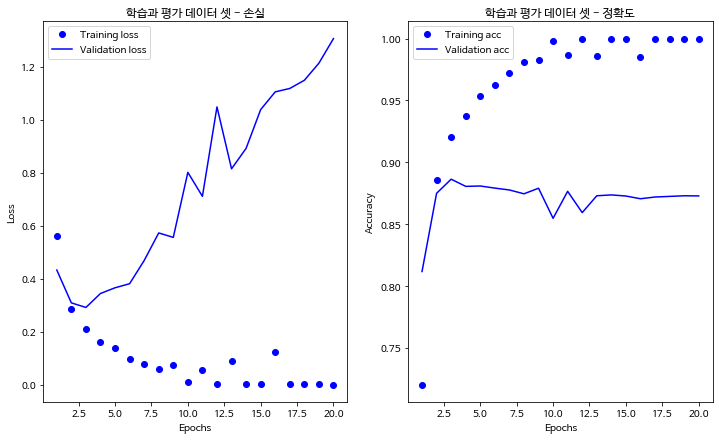

In [34]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('학습과 평가 데이터 셋 - 손실')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('학습과 평가 데이터 셋 - 정확도')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.show()

In [35]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train, y_train, epochs=4, 
                 batch_size=512, validation_data=(X_val, y_val))
results = model.evaluate(X_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 24ms/step - loss: 0.4453 - accuracy: 0.8215 - val_loss: 0.2797 - val_accuracy: 0.9153
Epoch 2/4
49/49 [==============================] - 1s 19ms/step - loss: 0.2555 - accuracy: 0.9111 - val_loss: 0.1984 - val_accuracy: 0.9322
Epoch 3/4
49/49 [==============================] - 1s 19ms/step - loss: 0.1970 - accuracy: 0.9298 - val_loss: 0.1513 - val_accuracy: 0.9526
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2969 - accuracy: 0.8823


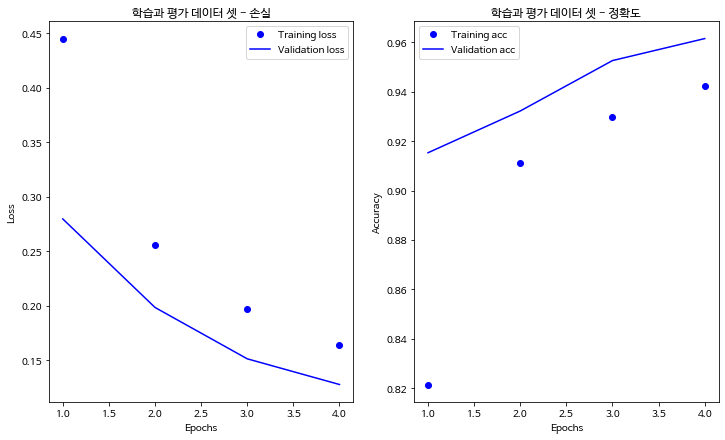

In [36]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
# 'bo'는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# 'b'는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('학습과 평가 데이터 셋 - 손실')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('학습과 평가 데이터 셋 - 정확도')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.show()

##### 추가 해보기
     1개 또는 3개의 은닉층을 사용하여 검증과 테스트 정확도 확인해 보기
     층에 은닉 유닛을 줄이거나 늘려보기 32개, 64개 등
     binary_crossentropy대신에 mse 손실함수 사용.
     relu대신에 tanh 활성화 함수를 사용하기

##### 추가 실습
     01 3개의 은닉층 사용하기(노드수 동일)
     02 2개의 은닉층 사용하기(노드수 동일)
     03 은닉층 개수는 동일하게 하고 노드수 늘리기(32개)
     04 은닉층 개수는 동일하게 하고 노드수 늘리기(64개)
     05 은닉층 개수는 동일하게 하고 노드수 늘리기(128개)
     06 tanh활성화 함수 사용하기
     07 배치 사이즈 변경(512->128)